## Question 1

A publishing firm wants to develop special printing machines for English. For this,
they need to determine the probability of occurrence of specific letters and words. You
are given two large text files (fileA and fileB).

NOTE: characters like whitespace, special characters and punctuation are to be
omitted.

(a) Determine the probability of each alphabet in the English language. Upper-case
and lower-case alphabets are considered the same. List the top ten alphabets that
occur in fileA.

(b) The measure of uncertainty is determined by its entropy. Entropy should be computed as
H =
X(−pi
log pi)
where pi
is the probability of event i. If we consider the occurrence of alphabets in
English as events of interest, determine the entropy. In other words, determine the
uncertainty of alphabets in the English language using fileB.

(c) Repeat (a) and (b) if word is considered as an event and use fileC and fileD for
analysis.

In [97]:
import re
from collections import Counter
import math
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

In [98]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
def preprocess_text(file_path):
  with open(file_path,"r",encoding="utf-8") as file:
    content = file.read()
  preprocessed_content = re.sub(r'[^a-zA-Z]','',content).lower() ##Omitting the special characters, whitespaces and punctuations and then converting the content to lowercase
  return preprocessed_content

In [100]:
def calculate_aplphabet_probabilities(text):
  total_chars = len(text)
  char_counts = Counter(text) ##Using the counter function to find the frequencies of the letters
  probabilities = {char: count/total_chars  for char,count in char_counts.items()} ##finding probabilities using classical probability definition
  return probabilities


In [101]:
def calculate_entropy(probabilities):
  entropy = -sum(p*math.log(p,2) for p in probabilities.values() if p>0) ##Calcuting the entropy using the formula given
  return entropy

In [102]:
def preprocess_words(file_path):
  with open(file_path,"r",encoding="utf-8") as file:
    content = file.read()
  words = re.findall(r'\b[a-zA-Z]+\b',content.lower()) ##Converting the content to lower case and also omitting special characters and whitespaces sort of entities
  return words

In [103]:
def calculate_word_probabilities(words):
  total_words = len(words)
  word_counts = Counter(words) ##Using the counter function to find the frequencies of the words
  probabilities = {word: count/total_words for word,count in word_counts.items()} ##Finding the probabilities using the classical frequency definition
  return probabilities

In [104]:
def task1(fileA): ##Finding the letter probabilities
  print("_________________Task 1_____________________")
  content = preprocess_text(fileA)
  probabilities = calculate_aplphabet_probabilities(content)
  top_10_alphabets = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)[:10] ##Sorting the letters via probabilities to find the top 10 letters
  print("Top 10 alphabets in terms of probabilities of occurence:")
  for char,prob in top_10_alphabets:
    print(f"{char}: {prob:.4f}")

In [105]:
def task2(fileB): ##Finding the letter entropy
  print("_________________Task 2_____________________")
  content = preprocess_text(fileB)
  probabilities = calculate_aplphabet_probabilities(content)
  entropy = calculate_entropy(probabilities) ##Using the probabilities found to find the entropy since entropy is dependent on probabilities
  print(f"Entropy of alphabet occurence: {entropy:.4f}")


In [106]:
def task3(fileC): ##Finding the word probabilities
  print("_________________Task 3____________________")
  words = preprocess_words(fileC)
  probabilities = calculate_word_probabilities(words)
  top_10_probabilities = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)[:10]
  print("Top 10 words in terms of probabilities of occurence:")
  for word,prob in top_10_probabilities:
    print(f"{word}: {prob:.4f}")

##Used the same approach as in case of letters

In [107]:
def task4(fileD): ##Finding the word entropy
  print("_________________Task 4_____________________")
  words = preprocess_words(fileD)
  probabilities = calculate_word_probabilities(words)
  entropy = calculate_entropy(probabilities)
  print(f"Entropy of word occurence: {entropy:.4f}")

##used the same approach as in case of letters

In [108]:
def script(fileA,fileB,fileC,fileD):
  task1(fileA) ##letter probabilities for fileA
  task2(fileB) ##letter entropy for fileB
  task3(fileC) ##word probabilities for fileC
  task4(fileC) ##word entropy for fileC
  task3(fileD) ##word probabilities for fileD
  task4(fileD) ##word entropy for fileD

In [109]:
def main():
  fileA = "/content/drive/MyDrive/Course Work/Sem 4/Statistical Programming/Assignment 1/Assignment_1/fileA.txt"
  fileB = "/content/drive/MyDrive/Course Work/Sem 4/Statistical Programming/Assignment 1/Assignment_1/fileB.txt"
  fileC = "/content/drive/MyDrive/Course Work/Sem 4/Statistical Programming/Assignment 1/Assignment_1/fileC.txt"
  fileD = "/content/drive/MyDrive/Course Work/Sem 4/Statistical Programming/Assignment 1/Assignment_1/fileD.txt"
  script(fileA,fileB,fileC,fileD)

In [110]:
main()

_________________Task 1_____________________
Top 10 alphabets in terms of probabilities of occurence:
s: 0.0424
z: 0.0413
y: 0.0413
f: 0.0408
w: 0.0403
t: 0.0401
u: 0.0401
x: 0.0400
j: 0.0398
k: 0.0396
_________________Task 2_____________________
Entropy of alphabet occurence: 4.1760
_________________Task 3____________________
Top 10 words in terms of probabilities of occurence:
the: 0.0805
of: 0.0356
and: 0.0302
to: 0.0272
a: 0.0249
in: 0.0244
is: 0.0145
be: 0.0122
as: 0.0099
that: 0.0092
_________________Task 4_____________________
Entropy of word occurence: 8.9415
_________________Task 3____________________
Top 10 words in terms of probabilities of occurence:
the: 0.0691
and: 0.0369
of: 0.0362
i: 0.0340
a: 0.0248
to: 0.0216
in: 0.0170
was: 0.0157
that: 0.0127
my: 0.0124
_________________Task 4_____________________
Entropy of word occurence: 9.1784


## Question 2

Imagine that you are playing with a random number generator that produces
values between 0 and 1, perfectly spread (uniformly distributed). Now, what if you could
generate n of these numbers, calculate their mean and variance, and then watch how these
statistics change as n grows larger and larger? Does randomness settle into predictable
patterns as you generate more numbers? Try experimenting with different values of n.
What do you observe and why do you think it happens?

In [111]:
def generate_statistics(max_n,step_size,type_d,mean,std):
  means = []
  variances = []
  samples = range(step_size,max_n+1,step_size) ##Generating the array of sample_sizes

  for n in samples:
    if type_d=="u": ##If the type of distribution is "u" i.e. uniform, generate random numbers via uniform distribution
      random_numbers = np.random.uniform(0,1,n)
    elif type_d=="g": ##If the type of distribution is "g" i.e. gaussian, generate random numbers via normal/gaussian distribution
      random_numbers = np.random.normal(mean,std,n)
    else:
      return "Invalid Type" ##Custom edge case incorporated
    data = random_numbers.tolist() ##Converting the numpy array into list so that we can use the statistics library of python
    mean = stats.mean(data) ##Using the statistics library because it gives better and precise results on lists
    var = stats.variance(data)
    means.append(mean) ##Storing the means in the list
    variances.append(var)
  return samples,means,variances

In [112]:
def plot_configurations(max_n,step_size,type_d,mean,std):
  samples,means,variances = generate_statistics(max_n,step_size,type_d,mean,std) ##Generating the sample_sizes, means and varinaces
  plt.figure(figsize=(12,6)) ##Configuring the plotting mechanism
  return samples,means,variances

In [113]:
def plot_means(samples,means,mean): ##Plotting the means
  plt.subplot(1,2,1)
  plt.plot(samples,means,label="Mean",color="blue")
  plt.axhline(mean,color="red",linestyle="--",label=f"Expected Mean {mean}") ##Line which denotes the mean
  plt.title("Mean vs Sample Size")
  plt.xlabel("Sample Size")
  plt.ylabel("Mean")
  plt.legend()

In [114]:
def plot_variances(samples,variances,std): ##Plotting the variances
  plt.subplot(1,2,2)
  plt.plot(samples,variances,label="Variance",color="green")
  plt.axhline(std**2,color="red",linestyle="--",label=f"Expected Variance {std**2}") ##Line which denotes the variance
  plt.title("Variance vs Sample Size")
  plt.xlabel("Sample Size")
  plt.ylabel("Variance")
  plt.legend()

In [115]:
def plot(): ##Plotting the plots
  plt.tight_layout()
  plt.show()

In [116]:
def script(mean,std,type_d,max_n,step_size):
  samples,means,variances = plot_configurations(max_n,step_size,type_d,mean,std) ##Generating the sample sizes, means and variances
  plot_means(samples,means,mean) ##Using the sample sizes and means to plot the  curve
  plot_variances(samples,variances,std) ##Using the sample sizes and variances to plot the curve
  plot() ##Finally plotting the curve

In [117]:
def main():
  max_n = 10000 ##Max value of the sample size
  step_size = 100 ##Interval at which sample size is to be computed
  type_d = "u" ##Type of distribution i.e. here it is "u", which means uniform
  mean = 0.5 ##Mean for uniform
  std = math.sqrt(1/12) ##Standard Deviation for uniform
  script(mean,std,type_d,max_n,step_size) ##Using the logic

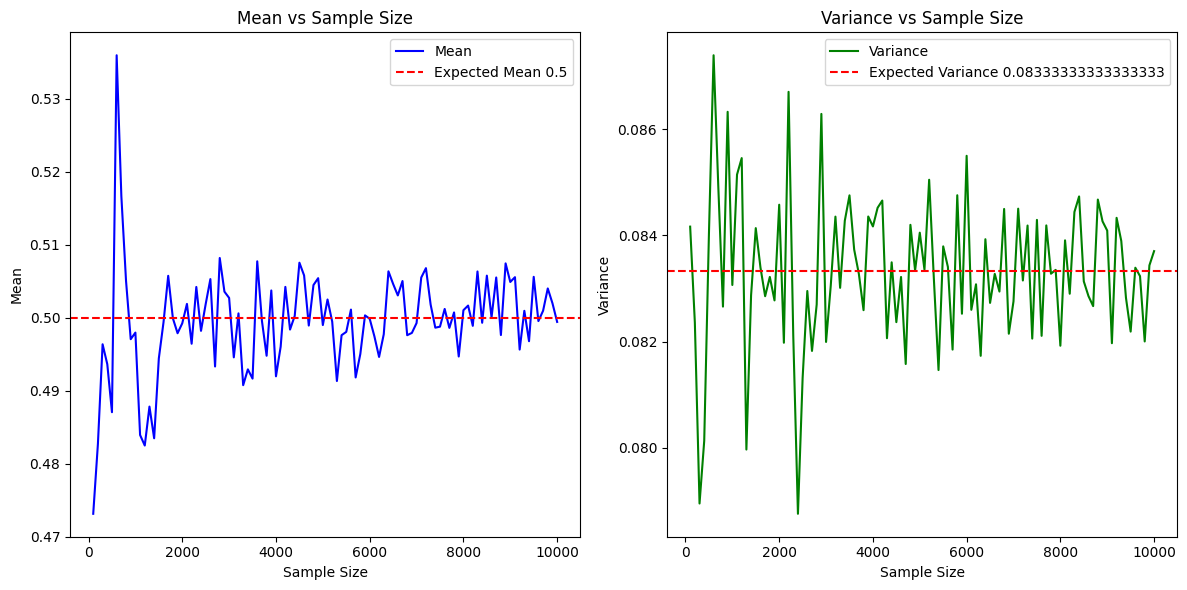

In [118]:
main()

## Discussions and Observations

# What happens as n increases?
1. Behaviour of mean: The sample mean converges to the theoretical mean i.e. 0.5, which is the center of the uniform distribution. This characteristic can be explained by the law of large numbers which states that as the sample size n increases, the sample mean approaches the population mean

2. Behaviour of variance: The sample variance converges to the theoretical variance which is equal to 1/12, and it can be derived using the expectation values of the square of the random variable and the expectation of the random variable itself.

3. Predictability of randomness: For small n , the mean and variance may fluctuate significantly due to the sampling variability and as the value of n grows larger, the fluctuations decreases and the statistics stabilize around their theoretical values.

# Why this happens?
1. Law of large numbers: As more samples are taken, the  average of the  observed values tends to the true average or the expected value

2. CLT: The CLT or Central Limit Theorem states that for sufficiently large values of n, the distribution of the sample mean will approximate a normal distribution, regardless of the original distribution, which concludes that the mean is increasingly predictable

3. Stability of variance: The uniform distribution's finite range ensures that the variance converges as n increases

# Observations
1. For smaller values of n, there are noticeable fluctuations in both the mean and variance because random variations dominate

2. For larger values of n, the mean and variance stabilize, showing that the randomness can be indeed settle into predictable patterns

# Conclusion
The phenomenon highlights how statistical properties of the random variables behave under the influence of large sample sizes, making randomness predictable in aggregate



## Question 3

Repeat the same experiment as in Question 2 but for a Gaussian distribution
having mean and standard deviation as 4 and 3 respectively.

NOTE: Random number, having a distribution (Gaussian and uniform), can be
generated using inbuilt function.

In [119]:
def main():
  max_n = 10000 ##Max value of the sample size
  step_size = 100 ##Interval using which the sample sizes are computed
  type_d = "g" ##Type of distribution i.e. "g" which means gaussian or normal
  mean = 4 ##Given mean is 4
  std = 3 ##Given std is 3 and therefore the variance is 9
  script(mean,std,type_d,max_n,step_size) ##Using the logic

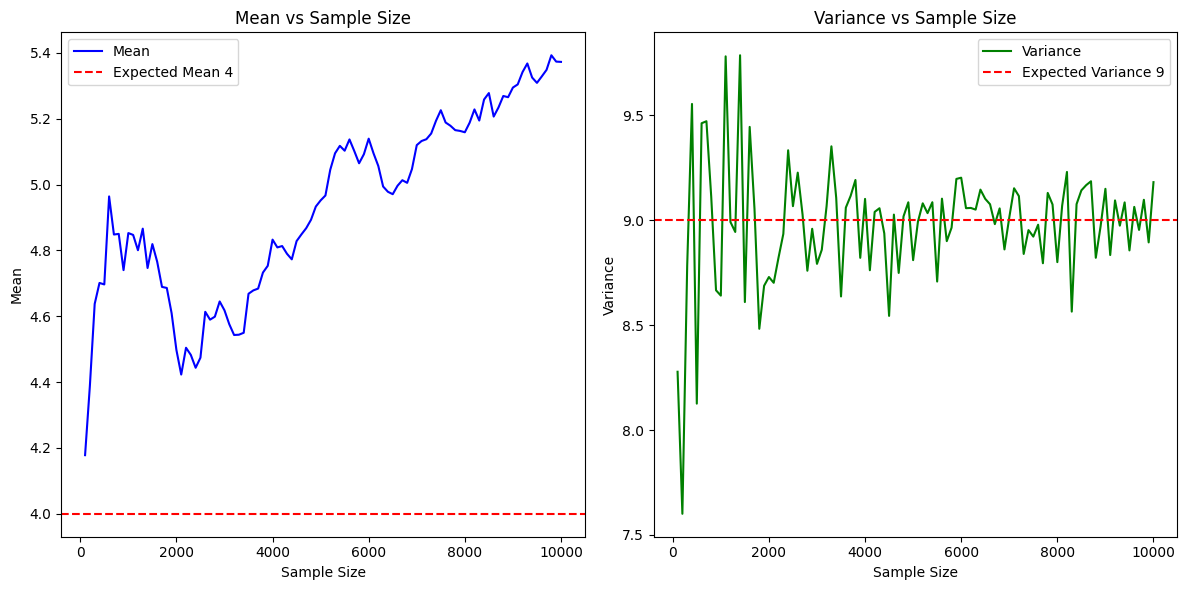

In [120]:
main()

## Discussions and Observations

# What happens as n increases?
1. Behaviour of mean: The sample mean converges to the theoretical mean given i.e. 4. This characteristic can be explained by the law of large numbers which states that as the sample size n increases, the sample mean approaches the theoretical mean.

2. Behaviour of variance: The sample variance converges to the theoretical variance given which is equal to 9. For small n, the sample variance fluctuates nore but soon stabilizes as n grows.

3. Predictability of randomness: For small n , the mean and variance may fluctuate significantly due to the sampling variability and as the value of n grows larger, the fluctuations decreases and the statistics stabilize around their theoretical values.

# Why this happens?
1. Law of large numbers: As more samples are taken, the average of the  observed values tends to the theoretical values, diminishing the effect of the outliers.

2. CLT: The CLT or Central Limit Theorem states that for sufficiently large values of n, the distribution of the sample mean will approximate a normal distribution, regardless of the original distribution, which concludes that the mean and variance is increasingly predictable

3. Properties of gaussian distribution: The bell curve naturally centers values around the mean, making it more predictable as n increases.

# Comparison with uniform distribution
1. Faster convergence: A gaussian distribution tends to converge to the mean and variance faster than a uniform distribution due to the stronger central tendency of the bell-shaped curve.

2. Expected variance: For the given gaussian distribution, the variance is 9 i.e. square of the given standard deviation (3), much larger than the variance (1/12) for a uniform distribution on [0,1]

# Observations
1. For smaller values of n, there are noticeable fluctuations in both the mean and variance because random variations dominate.

2. For larger values of n, the mean and variance stabilize, showing that the randomness can be indeed settle into predictable patterns.

# Conclusion
The phenomenon highlights how statistical properties of the random variables behave under the influence of large sample sizes, making randomness predictable in aggregate

